<a href="https://colab.research.google.com/github/IonaSantana/Artificial-Intelligence/blob/main/Projects/Visao-Computacional/Qual_%C3%A9_o_n%C3%BAmero%3F/recognize_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
from google.colab.patches import cv2_imshow
cv2_imshow(train_X[0])

In [17]:
train_X[0].shape

(28, 28)

In [22]:
network = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(128, activation = 'relu'),
                                      tf.keras.layers.Dense(10)
])

In [26]:
network.compile(optimizer='adam',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [28]:
network.fit(x=train_X, y=train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4439 - accuracy: 0.8594
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.9128
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2781 - accuracy: 0.9303
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2444 - accuracy: 0.9374
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2265 - accuracy: 0.9430
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2060 - accuracy: 0.9480
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2024 - accuracy: 0.9494
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1916 - accuracy: 0.9527
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1869 - accuracy: 0.9543
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.179

### Testando o conjunto de Teste

In [29]:
test_loss, test_acc = network.evaluate(test_X, test_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.3245 - accuracy: 0.9447


### Fazendo predições

In [39]:
probability_model = tf.keras.Sequential([network,
                                        tf.keras.layers.Softmax()])

In [40]:
predictions = probability_model.predict(test_X) #assim pega a probabilidade

In [93]:
def plot_image(i, predictions, true_labels, images):
  true_label, img = true_labels[i], images[i]
  plt.axis('off')
  plt.imshow(img, 'gray')
  predicted_label = np.argmax(predictions[i])

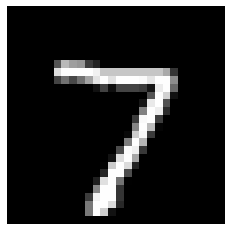

In [94]:
plot_image(0, predictions, test_y, test_X)

In [102]:
def plot_value_array(i, predictions, true_labels):
  true_label = true_labels[i]
  this_plot = plt.bar(range(10), predictions[i])
  plt.xticks(range(10))
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions[i])
  this_plot[predicted_label].set_color('blue')
  this_plot[true_label].set_color('green')

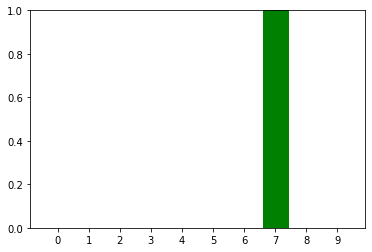

In [103]:
plot_value_array(0,predictions, test_y)

In [127]:
def show_images(X,y, predictions):
  
  num_rows = 5
  num_cols = 4
  num_images = num_rows * num_cols
  plt.figure(figsize=(2*(2.5)*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y, X )
    plt.axis('off')
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y)
  plt.show()

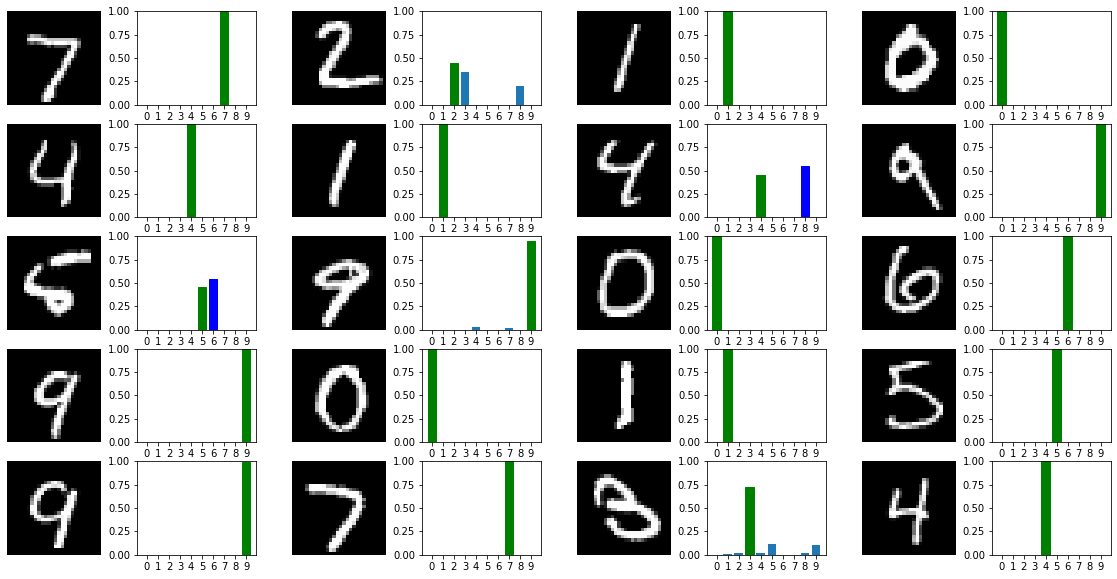

In [128]:
show_images(test_X, test_y, predictions)